当人们想了解同因素，不同水平对因变量（连续的）的影响。例如：不同生产厂家机器产量，药物不同剂量的影响...可使用单因素方差分析
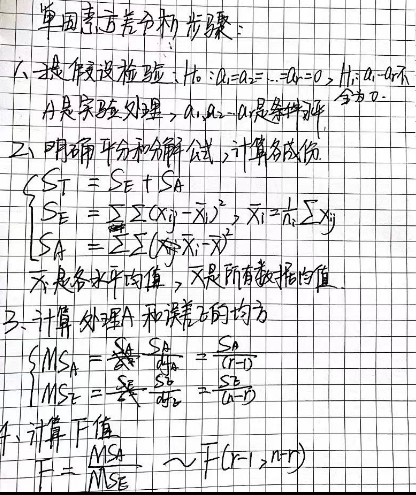
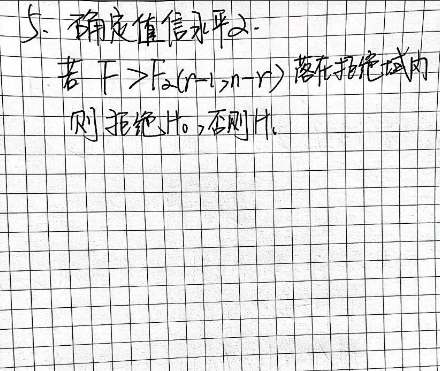

In [41]:
#使用avo()函数

#举例，A是处理水平，X是数据结果
lamp<-data.frame(
    X=c(1600, 1610, 1650, 1680, 1700, 1700, 1780, 1500, 1640,
    1400, 1700, 1750, 1640, 1550, 1600, 1620, 1640, 1600,
    1740, 1800, 1510, 1520, 1530, 1570, 1640, 1600),
     A=factor(c(rep(1,7),rep(2,5), rep(3,8), rep(4,6)))
)

In [42]:
lamp

X,A
<dbl>,<fct>
1600,1
1610,1
1650,1
1680,1
1700,1
1700,1
1780,1
1500,2
1640,2


In [43]:
lamp.aov <- aov(X ~ A, data=lamp)
summary(lamp.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
A            3  49212   16404   2.166  0.121
Residuals   22 166622    7574               

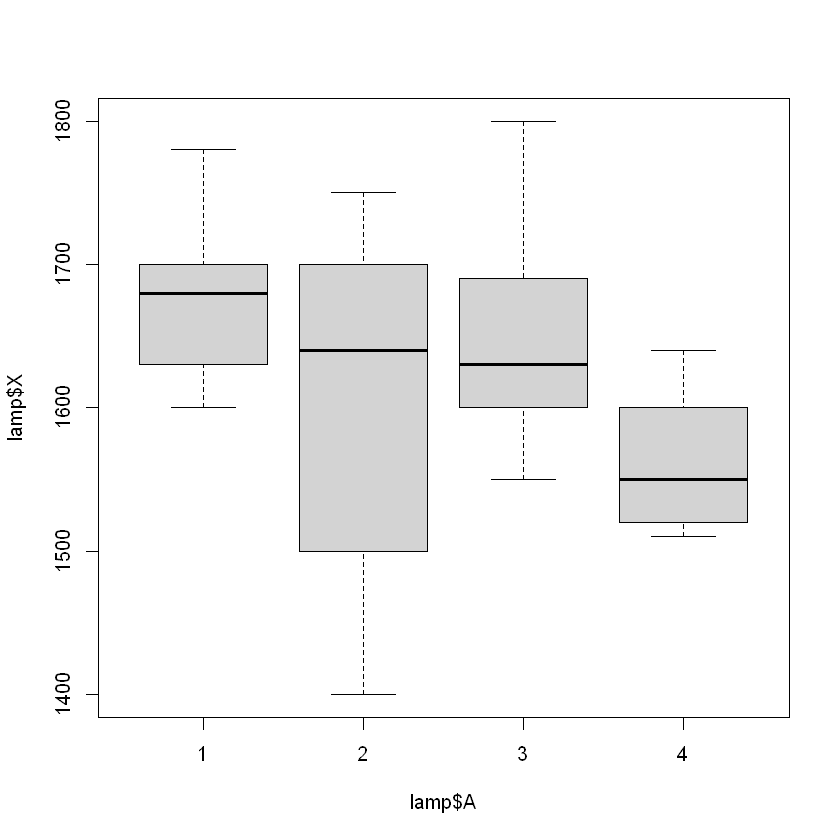

In [44]:
plot(lamp$X ~ lamp$A)

In [45]:
# 小白鼠接种3种病毒，存活天数如下
mouse<-data.frame(
    X=c( 2, 4, 3, 2, 4, 7, 7, 2, 2, 5, 4, 5, 6, 8, 5, 10, 7,
    12, 12, 6, 6, 7, 11, 6, 6, 7, 9, 5, 5, 10, 6, 3, 10),
    A=factor(c(rep(1,11),rep(2,10), rep(3,12)))
)

In [46]:
mouse

X,A
<dbl>,<fct>
2,1
4,1
3,1
2,1
4,1
7,1
7,1
2,1
2,1


In [47]:
mouse.aov <- aov(X ~ A, data=mouse)
summary(mouse.aov)

            Df Sum Sq Mean Sq F value Pr(>F)   
A            2  94.26   47.13   8.484 0.0012 **
Residuals   30 166.65    5.56                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [ ]:
#均值多重比较
#1. 多重t检验

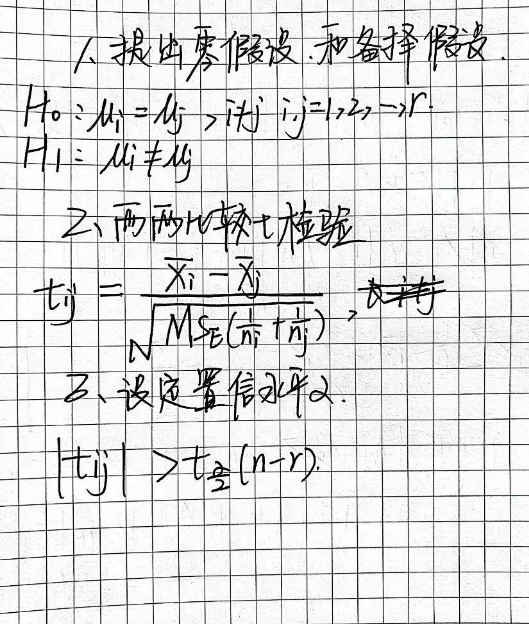

In [48]:
#使用pairwise.t.test()
mu<-c(mean(mouse[mouse$A==1,'X']), mean(mouse[mouse$A==2,'X']), mean(mouse[mouse$A==3,'X'])); 
mu

pairwise.t.test(mouse$X, mouse$A)


[1] 3.818182 7.700000 7.083333


	Pairwise comparisons using t tests with pooled SD 

data:  mouse$X and mouse$A 

  1      2     
2 0.0021 -     
3 0.0048 0.5458

P value adjustment method: holm 

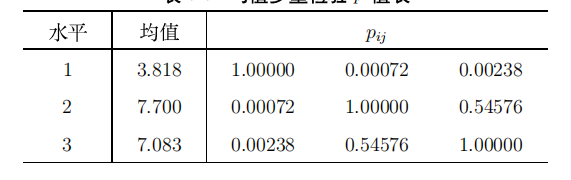

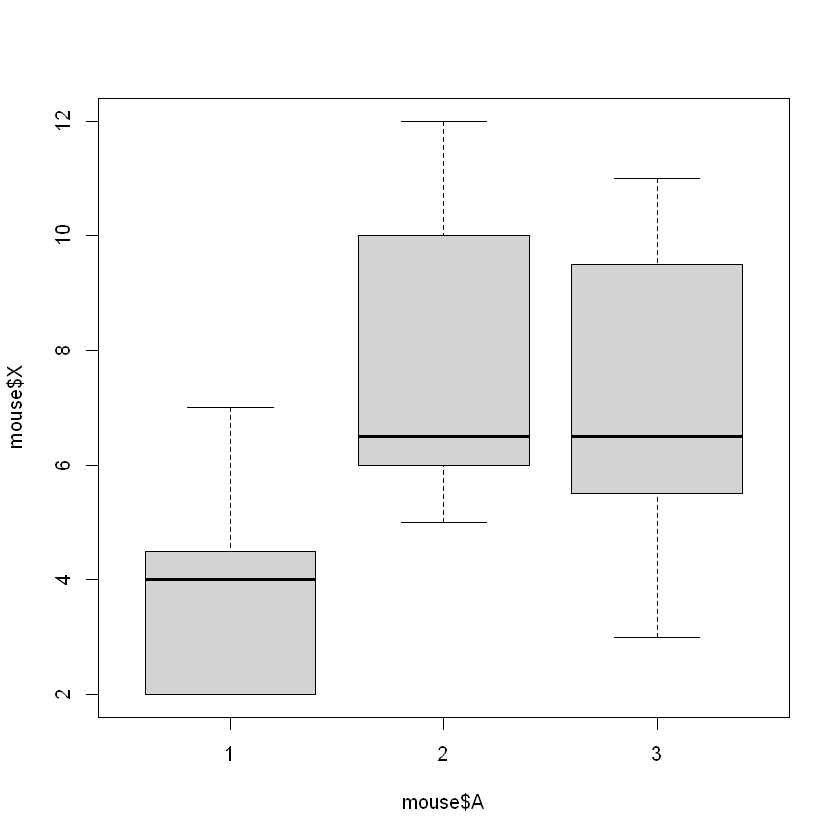

In [49]:
plot(mouse$X~mouse$A)

方差分析条件：
1. 可加性。线性可加
2. 独立正态性。实验误差服从正态性
3. 方差齐性。不同处理间方差一致

In [54]:
#1.检查正态性
shapiro.test(mouse[mouse$A==1,'X'])


	Shapiro-Wilk normality test

data:  mouse[mouse$A == 1, "X"]
W = 0.84638, p-value = 0.03828


In [51]:
shapiro.test(mouse[mouse$A==2,'X'])


	Shapiro-Wilk normality test

data:  mouse[mouse$A == 2, "X"]
W = 0.84235, p-value = 0.04708


In [52]:
shapiro.test(mouse[mouse$A==3,'X'])


	Shapiro-Wilk normality test

data:  mouse[mouse$A == 3, "X"]
W = 0.94067, p-value = 0.5068


In [53]:
#2.方差齐性检验（Bartlett检验）
bartlett.test(X~A, data=mouse)


	Bartlett test of homogeneity of variances

data:  X by A
Bartlett's K-squared = 1.2068, df = 2, p-value = 0.5469
